In [13]:
import numpy as np
from scipy.stats import binom
from numpy.random import choice
import matplotlib.pyplot as plt
import arviz as az  #ArviZ: Exploratory analysis of Bayesian models
import pymc3
%matplotlib inline
plt.style.use('ggplot')

#### code 3.2 ~ 3.5

In [2]:
p_grid = np.linspace(start=0, stop=1, num=1000)
prior = np.repeat(1, 1000)
likelihood = binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior/np.sum(posterior)

In [3]:
len(posterior)

1000

In [8]:
samples = choice(p_grid, size=10000, replace=True, p=posterior)

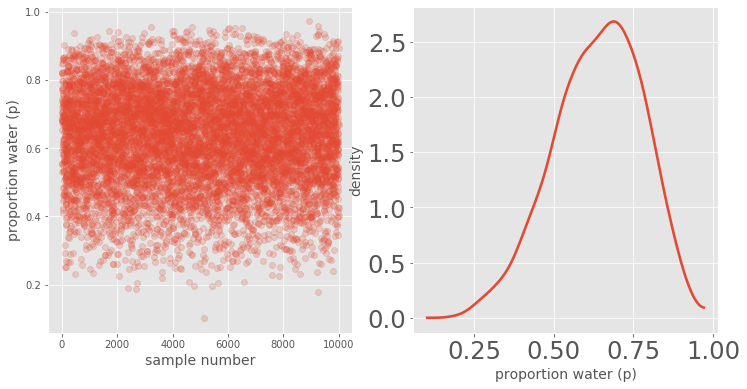

In [12]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);




#### code 3.13 HPD interval

In [17]:
a, b = pymc3.stats.hpd(samples)

array([0.38538539, 0.88888889])

### 3.3 sampling to simulate prediction
#### code 3.20 ~ 3.23

In [20]:
binom.pmf(k=np.array([0, 1, 2]), n=2, p=0.7)

array([0.09, 0.42, 0.49])

In [22]:
binom.rvs(n=2, p=0.7, size=10) #notice that the arguments here are different from R

array([1, 1, 2, 2, 1, 1, 2, 0, 2, 2])

In [35]:
dummy_w = binom.rvs(n=2, p=0.7, size=int(1e5))
_, counts = np.unique(dummy_w, return_counts=True)
counts/int(1e5)

# or use 
# [(dummy_w == i).mean() for i in range(3)]

array([0.08931, 0.41794, 0.49275])

#### 3.26
##### it seems that scipy.binom does not have an equivalent function for rbinom in R

NameError: name 'binom' is not defined